<a href="https://colab.research.google.com/github/jaquelinecella/Analise_Exploratoria_Pandas/blob/main/Projeto_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**PROJETO DE ANÁLISE EXPLORATÓRIA** 

Análise Exploratória realizada com dados das bolsas de estudo PROUNI concedidas no ano de 2020. Os dados foram extraídos do site oficial do Governo Federal https://dadosabertos.mec.gov.br/prouni/item/124-bolsas-e-perfil-2020. Projeto em andamento.

#1. Importação das bibliotecas que serão utilizadas

In [2]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
from geopy.geocoders import Nominatim
import folium
from folium.plugins import HeatMap


#2.Leitura do arquivo original extraído do site oficial

In [3]:
original = pd.read_csv('ProuniRelatorioDadosAbertos2020.csv', encoding= "ISO-8859-1", sep = ';')
                       

#3.Limpeza, organização e transformação dos dados

In [ ]:
original

##Gerando cópia do arquivo original para realizar manipulação com segurança

In [5]:
original_copia = original.copy()

In [ ]:
original_copia.head(10)

##Verificando a quantidade de linhas e colunas do DataFrame


In [7]:
original_copia.shape

(166830, 17)

In [ ]:
original_copia.head(5)

##Verificando o tipo dos dados presentes no DataFrame para identificar se é necessário realizar conversão

In [9]:
original_copia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 166830 entries, 0 to 166829
Data columns (total 17 columns):
 #   Column                          Non-Null Count   Dtype 
---  ------                          --------------   ----- 
 0   ANO_CONCESSAO_BOLSA             166830 non-null  int64 
 1   CODIGO_EMEC_IES_BOLSA           166830 non-null  int64 
 2   NOME_IES_BOLSA                  166830 non-null  object
 3   MUNICIPIO                       166830 non-null  object
 4   CAMPUS                          166830 non-null  object
 5   TIPO_BOLSA                      166830 non-null  object
 6   MODALIDADE_ENSINO_BOLSA         166830 non-null  object
 7   NOME_CURSO_BOLSA                166792 non-null  object
 8   NOME_TURNO_CURSO_BOLSA          166830 non-null  object
 9   CPF_BENEFICIARIO                166830 non-null  object
 10  SEXO_BENEFICIARIO               166830 non-null  object
 11  RACA_BENEFICIARIO               166830 non-null  object
 12  DATA_NASCIMENTO               

##Convertendo o formato do campo 'DATA_NASCIMENTO' para datetime.

In [10]:
pd.to_datetime(original_copia['DATA_NASCIMENTO'])

0        1973-11-08
1        1987-05-13
2        2001-07-23
3        2003-04-04
4        1977-07-12
            ...    
166825   1996-11-30
166826   2002-03-25
166827   1997-04-19
166828   1975-09-17
166829   1996-06-25
Name: DATA_NASCIMENTO, Length: 166830, dtype: datetime64[ns]

In [11]:
original_copia['DATA_NASCIMENTO'] = pd.to_datetime(original_copia['DATA_NASCIMENTO'])

In [12]:
original_copia.info() #conversão ok

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 166830 entries, 0 to 166829
Data columns (total 17 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   ANO_CONCESSAO_BOLSA             166830 non-null  int64         
 1   CODIGO_EMEC_IES_BOLSA           166830 non-null  int64         
 2   NOME_IES_BOLSA                  166830 non-null  object        
 3   MUNICIPIO                       166830 non-null  object        
 4   CAMPUS                          166830 non-null  object        
 5   TIPO_BOLSA                      166830 non-null  object        
 6   MODALIDADE_ENSINO_BOLSA         166830 non-null  object        
 7   NOME_CURSO_BOLSA                166792 non-null  object        
 8   NOME_TURNO_CURSO_BOLSA          166830 non-null  object        
 9   CPF_BENEFICIARIO                166830 non-null  object        
 10  SEXO_BENEFICIARIO               166830 non-null  object 

In [ ]:
original_copia.head(5)

In [ ]:
original_copia.info()

##Verificando quantos dados há por coluna para avaliar a transformação para category.

In [ ]:
original_copia.nunique()

##Ordenando os dados para facilitar a identificação

In [16]:
ordenando = pd.DataFrame.from_records([(col, original_copia[col].nunique())
              for col in original_copia.columns],
              columns=['coluna', 'qt_dados']).sort_values(by=['qt_dados'])

In [17]:
ordenando

,coluna,qt_dados
0,ANO_CONCESSAO_BOLSA,1
13,BENEFICIARIO_DEFICIENTE_FISICO,2
10,SEXO_BENEFICIARIO,2
6,MODALIDADE_ENSINO_BOLSA,2
5,TIPO_BOLSA,2
14,REGIAO_BENEFICIARIO,5
8,NOME_TURNO_CURSO_BOLSA,5
11,RACA_BENEFICIARIO,6
15,UF_BENEFICIARIO,27
7,NOME_CURSO_BOLSA,317


##Organizando colunas para transformação para category

In [18]:
cat = ['ANO_CONCESSAO_BOLSA', 'BENEFICIARIO_DEFICIENTE_FISICO', 'SEXO_BENEFICIARIO', 'MODALIDADE_ENSINO_BOLSA', 'TIPO_BOLSA', 'REGIAO_BENEFICIARIO',
 'NOME_TURNO_CURSO_BOLSA', 'RACA_BENEFICIARIO']

In [19]:
print(cat)

['ANO_CONCESSAO_BOLSA', 'BENEFICIARIO_DEFICIENTE_FISICO', 'SEXO_BENEFICIARIO', 'MODALIDADE_ENSINO_BOLSA', 'TIPO_BOLSA', 'REGIAO_BENEFICIARIO', 'NOME_TURNO_CURSO_BOLSA', 'RACA_BENEFICIARIO']


##Convertendo os atributos para category

In [20]:
for a in cat:
  original_copia[a]= pd.Categorical(original_copia[a])

In [ ]:
original_copia.info()

##Ano da concessão da bolsa deveria ter ficado 'int' para fazer a subtração com o "ANO_NASCIMENTO"

In [22]:
original_copia['ANO_CONCESSAO_BOLSA'] = original_copia['ANO_CONCESSAO_BOLSA'].astype(int)

In [23]:
original_copia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 166830 entries, 0 to 166829
Data columns (total 17 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   ANO_CONCESSAO_BOLSA             166830 non-null  int64         
 1   CODIGO_EMEC_IES_BOLSA           166830 non-null  int64         
 2   NOME_IES_BOLSA                  166830 non-null  object        
 3   MUNICIPIO                       166830 non-null  object        
 4   CAMPUS                          166830 non-null  object        
 5   TIPO_BOLSA                      166830 non-null  category      
 6   MODALIDADE_ENSINO_BOLSA         166830 non-null  category      
 7   NOME_CURSO_BOLSA                166792 non-null  object        
 8   NOME_TURNO_CURSO_BOLSA          166830 non-null  category      
 9   CPF_BENEFICIARIO                166830 non-null  object        
 10  SEXO_BENEFICIARIO               166830 non-null  categor

In [24]:
original_copia.isnull()

,ANO_CONCESSAO_BOLSA,CODIGO_EMEC_IES_BOLSA,NOME_IES_BOLSA,MUNICIPIO,CAMPUS,TIPO_BOLSA,MODALIDADE_ENSINO_BOLSA,NOME_CURSO_BOLSA,NOME_TURNO_CURSO_BOLSA,CPF_BENEFICIARIO,SEXO_BENEFICIARIO,RACA_BENEFICIARIO,DATA_NASCIMENTO,BENEFICIARIO_DEFICIENTE_FISICO,REGIAO_BENEFICIARIO,UF_BENEFICIARIO,MUNICIPIO_BENEFICIARIO
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166825,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
166826,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
166827,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
166828,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [25]:
original_copia['NOME_CURSO_BOLSA'].nunique()

317

##Verificando se há um 'TRUE'que indique valores nulos

In [26]:
original_copia.isnull().nunique()


ANO_CONCESSAO_BOLSA               1
CODIGO_EMEC_IES_BOLSA             1
NOME_IES_BOLSA                    1
MUNICIPIO                         1
CAMPUS                            1
TIPO_BOLSA                        1
MODALIDADE_ENSINO_BOLSA           1
NOME_CURSO_BOLSA                  2
NOME_TURNO_CURSO_BOLSA            1
CPF_BENEFICIARIO                  1
SEXO_BENEFICIARIO                 1
RACA_BENEFICIARIO                 1
DATA_NASCIMENTO                   1
BENEFICIARIO_DEFICIENTE_FISICO    1
REGIAO_BENEFICIARIO               1
UF_BENEFICIARIO                   1
MUNICIPIO_BENEFICIARIO            1
dtype: int64

##Conforme também verificado com o 'nunique', há algo a ser observado no campo "NOME_CURSO_BOLSA". Problema desde a origem, pois coluna não foi manipulada. Campos nulos serão tratados na sequência.

In [127]:
nome_curso_bolsa_ordem = original_copia['NOME_CURSO_BOLSA'].value_counts()

In [128]:
nome_curso_bolsa_ordem.sort_values()

MINISTRIO PASTORAL                                       1
GESTÇO EM LOGÖSTICA                                       1
AQICULTURA                                               1
SECRETARIADO EXECUTIVO BILINGUE - PORTUGUÒS/INGLÒS        1
GESTÇO EM SAéDE AMBIENTAL                                 1
                                                      ...  
CIÒNCIAS CONTµBEIS                                     8570
ENFERMAGEM                                             9234
PEDAGOGIA                                             13660
ADMINISTRAÇO                                         14888
DIREITO                                               15082
Name: NOME_CURSO_BOLSA, Length: 318, dtype: int64

##Verificando quais as linhas que estão com valores nulos no DataFrame

In [31]:
faltantes = original[original['NOME_CURSO_BOLSA'].isna()]


In [32]:
faltantes

,ANO_CONCESSAO_BOLSA,CODIGO_EMEC_IES_BOLSA,NOME_IES_BOLSA,MUNICIPIO,CAMPUS,TIPO_BOLSA,MODALIDADE_ENSINO_BOLSA,NOME_CURSO_BOLSA,NOME_TURNO_CURSO_BOLSA,CPF_BENEFICIARIO,SEXO_BENEFICIARIO,RACA_BENEFICIARIO,DATA_NASCIMENTO,BENEFICIARIO_DEFICIENTE_FISICO,REGIAO_BENEFICIARIO,UF_BENEFICIARIO,MUNICIPIO_BENEFICIARIO
166273,2020,1270,CENTRO UNIVERSITµRIO ESTµCIO DE RIBEIRÇO PRETO,ITAJAI,EAD ITAJAÖ - SC,INTEGRAL,EAD,NaN,CURSO A DIST¶NCIA,106.XXX.XXX-77,F,Branca,01/06/1998,N,SUL,SC,ITAJAI
166274,2020,14,UNIVERSIDADE DO VALE DO RIO DOS SINOS,CAXIAS DO SUL,POLO UNISINOS CAXIAS DO SUL,INTEGRAL,EAD,NaN,CURSO A DIST¶NCIA,868.XXX.XXX-53,M,Parda,07/07/1983,N,SUL,RS,CAXIAS DO SUL
166353,2020,519,UNIVERSIDADE CATàLICA DO SALVADOR,SALVADOR,CAMPUS - FEDERAÇO,INTEGRAL,PRESENCIAL,NaN,MATUTINO,075.XXX.XXX-12,F,NÆo Informada,12/06/1999,N,NORDESTE,BA,SIMOES FILHO
166405,2020,137,CENTRO UNIVERSITµRIO SAGRADO CORAÇO,BAURU,CAMPUS - BAURU - JARDIM BRASIL,INTEGRAL,PRESENCIAL,NaN,NOTURNO,465.XXX.XXX-85,M,Branca,17/11/2000,N,SUDESTE,SP,IACANGA
166406,2020,4915,FACULDADE ESTµCIO DE CASTANHAL,CASTANHAL,CASTANHAL,INTEGRAL,PRESENCIAL,NaN,NOTURNO,053.XXX.XXX-46,M,NÆo Informada,13/09/2001,N,NORTE,PA,ABAETETUBA
166407,2020,457,UNIVERSIDADE ANHANGUERA DE SÇO PAULO,SAO PAULO,SAO PAULO (CL),INTEGRAL,PRESENCIAL,NaN,MATUTINO,424.XXX.XXX-35,F,Branca,28/12/1996,N,SUDESTE,SP,TABOAO DA SERRA
166420,2020,434,FACULDADE SANTA MARCELINA,SAO PAULO,UNIDADE ITAQUERA,INTEGRAL,PRESENCIAL,NaN,INTEGRAL,122.XXX.XXX-06,M,Branca,27/01/2000,N,SUDESTE,MG,PARA DE MINAS
166421,2020,163,UNIVERSIDADE ESTµCIO DE Sµ,RIO DE JANEIRO,EAD BONSUCESSO - RJ,INTEGRAL,EAD,NaN,CURSO A DIST¶NCIA,118.XXX.XXX-33,M,Preta,02/10/1996,N,SUDESTE,RJ,RIO DE JANEIRO
166472,2020,1414,CENTRO UNIVERSITµRIO SÇO LUCAS,PORTO VELHO,CAMPUS 1,PARCIAL,PRESENCIAL,NaN,INTEGRAL,147.XXX.XXX-90,F,Parda,18/01/1995,N,NORTE,PA,MARABA
166491,2020,2835,CENTRO UNIVERSITµRIO MAURÖCIO DE NASSAU,RECIFE,UNINASSAU - SEDE,INTEGRAL,PRESENCIAL,NaN,MATUTINO,131.XXX.XXX-59,M,Parda,09/11/2000,N,NORDESTE,PE,JABOATAO DOS GUARARAPES


##Verificando a quantidade de linhas que estão com NaN (38 linhas com NaN em NOME_CURSO_BOLSA)


In [33]:
faltantes.shape

(38, 17)

##Fazendo uma cópia do DataFrame para testar o 'fillna'

In [34]:
copia_2 = original_copia.copy()

##Substituindo os valores NaN para "NAO INFORMADO".

In [35]:
copia_2['NOME_CURSO_BOLSA'] = copia_2['NOME_CURSO_BOLSA'] .fillna(value='NAO INFORMADO')

In [36]:
copia_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 166830 entries, 0 to 166829
Data columns (total 17 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   ANO_CONCESSAO_BOLSA             166830 non-null  int64         
 1   CODIGO_EMEC_IES_BOLSA           166830 non-null  int64         
 2   NOME_IES_BOLSA                  166830 non-null  object        
 3   MUNICIPIO                       166830 non-null  object        
 4   CAMPUS                          166830 non-null  object        
 5   TIPO_BOLSA                      166830 non-null  category      
 6   MODALIDADE_ENSINO_BOLSA         166830 non-null  category      
 7   NOME_CURSO_BOLSA                166830 non-null  object        
 8   NOME_TURNO_CURSO_BOLSA          166830 non-null  category      
 9   CPF_BENEFICIARIO                166830 non-null  object        
 10  SEXO_BENEFICIARIO               166830 non-null  categor

##O 'fillna' parece ter funcionado

In [37]:
copia_2.isnull().nunique()

ANO_CONCESSAO_BOLSA               1
CODIGO_EMEC_IES_BOLSA             1
NOME_IES_BOLSA                    1
MUNICIPIO                         1
CAMPUS                            1
TIPO_BOLSA                        1
MODALIDADE_ENSINO_BOLSA           1
NOME_CURSO_BOLSA                  1
NOME_TURNO_CURSO_BOLSA            1
CPF_BENEFICIARIO                  1
SEXO_BENEFICIARIO                 1
RACA_BENEFICIARIO                 1
DATA_NASCIMENTO                   1
BENEFICIARIO_DEFICIENTE_FISICO    1
REGIAO_BENEFICIARIO               1
UF_BENEFICIARIO                   1
MUNICIPIO_BENEFICIARIO            1
dtype: int64

In [38]:
copia_2.isnull()

,ANO_CONCESSAO_BOLSA,CODIGO_EMEC_IES_BOLSA,NOME_IES_BOLSA,MUNICIPIO,CAMPUS,TIPO_BOLSA,MODALIDADE_ENSINO_BOLSA,NOME_CURSO_BOLSA,NOME_TURNO_CURSO_BOLSA,CPF_BENEFICIARIO,SEXO_BENEFICIARIO,RACA_BENEFICIARIO,DATA_NASCIMENTO,BENEFICIARIO_DEFICIENTE_FISICO,REGIAO_BENEFICIARIO,UF_BENEFICIARIO,MUNICIPIO_BENEFICIARIO
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166825,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
166826,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
166827,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
166828,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [39]:
copia_2['NOME_CURSO_BOLSA'].isnull().nunique()

1

##Aplicando o 'fillna' para a primeira cópia 'original_copia'

In [40]:
original_copia['NOME_CURSO_BOLSA'] = original_copia['NOME_CURSO_BOLSA'] .fillna(value='NAO INFORMADO')

In [41]:
original_copia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 166830 entries, 0 to 166829
Data columns (total 17 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   ANO_CONCESSAO_BOLSA             166830 non-null  int64         
 1   CODIGO_EMEC_IES_BOLSA           166830 non-null  int64         
 2   NOME_IES_BOLSA                  166830 non-null  object        
 3   MUNICIPIO                       166830 non-null  object        
 4   CAMPUS                          166830 non-null  object        
 5   TIPO_BOLSA                      166830 non-null  category      
 6   MODALIDADE_ENSINO_BOLSA         166830 non-null  category      
 7   NOME_CURSO_BOLSA                166830 non-null  object        
 8   NOME_TURNO_CURSO_BOLSA          166830 non-null  category      
 9   CPF_BENEFICIARIO                166830 non-null  object        
 10  SEXO_BENEFICIARIO               166830 non-null  categor

In [42]:
original_copia.isnull()

,ANO_CONCESSAO_BOLSA,CODIGO_EMEC_IES_BOLSA,NOME_IES_BOLSA,MUNICIPIO,CAMPUS,TIPO_BOLSA,MODALIDADE_ENSINO_BOLSA,NOME_CURSO_BOLSA,NOME_TURNO_CURSO_BOLSA,CPF_BENEFICIARIO,SEXO_BENEFICIARIO,RACA_BENEFICIARIO,DATA_NASCIMENTO,BENEFICIARIO_DEFICIENTE_FISICO,REGIAO_BENEFICIARIO,UF_BENEFICIARIO,MUNICIPIO_BENEFICIARIO
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166825,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
166826,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
166827,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
166828,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [43]:
original_copia.isnull().nunique()

ANO_CONCESSAO_BOLSA               1
CODIGO_EMEC_IES_BOLSA             1
NOME_IES_BOLSA                    1
MUNICIPIO                         1
CAMPUS                            1
TIPO_BOLSA                        1
MODALIDADE_ENSINO_BOLSA           1
NOME_CURSO_BOLSA                  1
NOME_TURNO_CURSO_BOLSA            1
CPF_BENEFICIARIO                  1
SEXO_BENEFICIARIO                 1
RACA_BENEFICIARIO                 1
DATA_NASCIMENTO                   1
BENEFICIARIO_DEFICIENTE_FISICO    1
REGIAO_BENEFICIARIO               1
UF_BENEFICIARIO                   1
MUNICIPIO_BENEFICIARIO            1
dtype: int64

In [44]:
original_copia['NOME_CURSO_BOLSA'].isnull().nunique()

1

##Adicionando uma coluna para cálculo da idade dos bolsistas

In [45]:
original_copia.tail(2)

,ANO_CONCESSAO_BOLSA,CODIGO_EMEC_IES_BOLSA,NOME_IES_BOLSA,MUNICIPIO,CAMPUS,TIPO_BOLSA,MODALIDADE_ENSINO_BOLSA,NOME_CURSO_BOLSA,NOME_TURNO_CURSO_BOLSA,CPF_BENEFICIARIO,SEXO_BENEFICIARIO,RACA_BENEFICIARIO,DATA_NASCIMENTO,BENEFICIARIO_DEFICIENTE_FISICO,REGIAO_BENEFICIARIO,UF_BENEFICIARIO,MUNICIPIO_BENEFICIARIO
166828,2020,1491,CENTRO UNIVERSITµRIO INTERNACIONAL,ANANINDEUA,PAP ANANINDEUA,PARCIAL,EAD,RELAåES INTERNACIONAIS,CURSO A DIST¶NCIA,601.XXX.XXX-53,F,Parda,1975-09-17,N,NORTE,PA,ANANINDEUA
166829,2020,1491,CENTRO UNIVERSITµRIO INTERNACIONAL,LAJEADO,PAP LAJEADO,PARCIAL,EAD,MéSICA,CURSO A DIST¶NCIA,032.XXX.XXX-63,M,Branca,1996-06-25,N,SUL,RS,ESTRELA


In [46]:
original_copia['ANO_CONCESSAO_BOLSA'].dtype


dtype('int64')

##Fazendo mais uma cópia para manipular o DataFrame e adicionando mais um coluna chamada 'ANO_NASCIMENTO'.

In [47]:
copia_3 = original_copia.copy()

In [48]:
copia_3.head(3)

,ANO_CONCESSAO_BOLSA,CODIGO_EMEC_IES_BOLSA,NOME_IES_BOLSA,MUNICIPIO,CAMPUS,TIPO_BOLSA,MODALIDADE_ENSINO_BOLSA,NOME_CURSO_BOLSA,NOME_TURNO_CURSO_BOLSA,CPF_BENEFICIARIO,SEXO_BENEFICIARIO,RACA_BENEFICIARIO,DATA_NASCIMENTO,BENEFICIARIO_DEFICIENTE_FISICO,REGIAO_BENEFICIARIO,UF_BENEFICIARIO,MUNICIPIO_BENEFICIARIO
0,2020,322,UNIVERSIDADE PAULISTA,IPATINGA,IPATINGA,INTEGRAL,EAD,PEDAGOGIA,CURSO A DIST¶NCIA,991.XXX.XXX-91,F,Parda,1973-11-08,N,SUDESTE,MG,GOVERNADOR VALADARES
1,2020,163,UNIVERSIDADE ESTµCIO DE Sµ,FORTALEZA,EAD VIA CORPVS - CE,INTEGRAL,EAD,MARKETING,CURSO A DIST¶NCIA,067.XXX.XXX-01,M,Parda,1987-05-13,N,NORDESTE,CE,FORTALEZA
2,2020,17670,FACULDADE DE QUIXERAMOBIM,QUIXERAMOBIM,FACULDADE DE QUIXERAMOBIM - UNIQ,INTEGRAL,PRESENCIAL,FARMµCIA,NOTURNO,623.XXX.XXX-27,M,Parda,2001-07-23,N,NORDESTE,CE,MOMBACA


In [49]:
copia_3['ANO_NASCIMENTO']=copia_3['DATA_NASCIMENTO'].dt.year

In [50]:
copia_3.head(5)

,ANO_CONCESSAO_BOLSA,CODIGO_EMEC_IES_BOLSA,NOME_IES_BOLSA,MUNICIPIO,CAMPUS,TIPO_BOLSA,MODALIDADE_ENSINO_BOLSA,NOME_CURSO_BOLSA,NOME_TURNO_CURSO_BOLSA,CPF_BENEFICIARIO,SEXO_BENEFICIARIO,RACA_BENEFICIARIO,DATA_NASCIMENTO,BENEFICIARIO_DEFICIENTE_FISICO,REGIAO_BENEFICIARIO,UF_BENEFICIARIO,MUNICIPIO_BENEFICIARIO,ANO_NASCIMENTO
0,2020,322,UNIVERSIDADE PAULISTA,IPATINGA,IPATINGA,INTEGRAL,EAD,PEDAGOGIA,CURSO A DIST¶NCIA,991.XXX.XXX-91,F,Parda,1973-11-08,N,SUDESTE,MG,GOVERNADOR VALADARES,1973
1,2020,163,UNIVERSIDADE ESTµCIO DE Sµ,FORTALEZA,EAD VIA CORPVS - CE,INTEGRAL,EAD,MARKETING,CURSO A DIST¶NCIA,067.XXX.XXX-01,M,Parda,1987-05-13,N,NORDESTE,CE,FORTALEZA,1987
2,2020,17670,FACULDADE DE QUIXERAMOBIM,QUIXERAMOBIM,FACULDADE DE QUIXERAMOBIM - UNIQ,INTEGRAL,PRESENCIAL,FARMµCIA,NOTURNO,623.XXX.XXX-27,M,Parda,2001-07-23,N,NORDESTE,CE,MOMBACA,2001
3,2020,203,UNIVERSIDADE SÇO JUDAS TADEU,SAO PAULO,PAULISTA,PARCIAL,PRESENCIAL,DIREITO,MATUTINO,089.XXX.XXX-40,F,Branca,2003-04-04,N,NORDESTE,BA,IBITITA,2003
4,2020,203,UNIVERSIDADE SÇO JUDAS TADEU,SAO PAULO,PAULISTA,INTEGRAL,PRESENCIAL,DIREITO,MATUTINO,173.XXX.XXX-09,F,Branca,1977-07-12,N,SUDESTE,SP,SAO PAULO,1977


##Verificando se campos estão no mesmo formato

In [51]:
copia_3['ANO_NASCIMENTO'].dtype

dtype('int64')

In [52]:
copia_3['ANO_CONCESSAO_BOLSA'].dtype

dtype('int64')

In [53]:
copia_3['IDADE']= copia_3['ANO_CONCESSAO_BOLSA'] - copia_3['ANO_NASCIMENTO']

In [54]:
copia_3.tail(4)

,ANO_CONCESSAO_BOLSA,CODIGO_EMEC_IES_BOLSA,NOME_IES_BOLSA,MUNICIPIO,CAMPUS,TIPO_BOLSA,MODALIDADE_ENSINO_BOLSA,NOME_CURSO_BOLSA,NOME_TURNO_CURSO_BOLSA,CPF_BENEFICIARIO,SEXO_BENEFICIARIO,RACA_BENEFICIARIO,DATA_NASCIMENTO,BENEFICIARIO_DEFICIENTE_FISICO,REGIAO_BENEFICIARIO,UF_BENEFICIARIO,MUNICIPIO_BENEFICIARIO,ANO_NASCIMENTO,IDADE
166826,2020,1491,CENTRO UNIVERSITµRIO INTERNACIONAL,CABO FRIO,PAP CABO FRIO,PARCIAL,EAD,RELAåES INTERNACIONAIS,CURSO A DIST¶NCIA,177.XXX.XXX-80,F,Parda,2002-03-25,N,SUDESTE,RJ,ARARUAMA,2002,18
166827,2020,1491,CENTRO UNIVERSITµRIO INTERNACIONAL,CANOAS,PAP CANOAS,PARCIAL,EAD,ADMINISTRAÇO,CURSO A DIST¶NCIA,042.XXX.XXX-54,M,Branca,1997-04-19,N,SUL,RS,CANOAS,1997,23
166828,2020,1491,CENTRO UNIVERSITµRIO INTERNACIONAL,ANANINDEUA,PAP ANANINDEUA,PARCIAL,EAD,RELAåES INTERNACIONAIS,CURSO A DIST¶NCIA,601.XXX.XXX-53,F,Parda,1975-09-17,N,NORTE,PA,ANANINDEUA,1975,45
166829,2020,1491,CENTRO UNIVERSITµRIO INTERNACIONAL,LAJEADO,PAP LAJEADO,PARCIAL,EAD,MéSICA,CURSO A DIST¶NCIA,032.XXX.XXX-63,M,Branca,1996-06-25,N,SUL,RS,ESTRELA,1996,24


##Adicionando colunas 'ANO_NASCIMENTO' e 'IDADE' para o DataFrame 'original_copia'.

In [55]:
original_copia['ANO_NASCIMENTO']=original_copia['DATA_NASCIMENTO'].dt.year

In [56]:
original_copia['IDADE']= original_copia['ANO_CONCESSAO_BOLSA'] - original_copia['ANO_NASCIMENTO']

In [57]:
original_copia.tail(3)

,ANO_CONCESSAO_BOLSA,CODIGO_EMEC_IES_BOLSA,NOME_IES_BOLSA,MUNICIPIO,CAMPUS,TIPO_BOLSA,MODALIDADE_ENSINO_BOLSA,NOME_CURSO_BOLSA,NOME_TURNO_CURSO_BOLSA,CPF_BENEFICIARIO,SEXO_BENEFICIARIO,RACA_BENEFICIARIO,DATA_NASCIMENTO,BENEFICIARIO_DEFICIENTE_FISICO,REGIAO_BENEFICIARIO,UF_BENEFICIARIO,MUNICIPIO_BENEFICIARIO,ANO_NASCIMENTO,IDADE
166827,2020,1491,CENTRO UNIVERSITµRIO INTERNACIONAL,CANOAS,PAP CANOAS,PARCIAL,EAD,ADMINISTRAÇO,CURSO A DIST¶NCIA,042.XXX.XXX-54,M,Branca,1997-04-19,N,SUL,RS,CANOAS,1997,23
166828,2020,1491,CENTRO UNIVERSITµRIO INTERNACIONAL,ANANINDEUA,PAP ANANINDEUA,PARCIAL,EAD,RELAåES INTERNACIONAIS,CURSO A DIST¶NCIA,601.XXX.XXX-53,F,Parda,1975-09-17,N,NORTE,PA,ANANINDEUA,1975,45
166829,2020,1491,CENTRO UNIVERSITµRIO INTERNACIONAL,LAJEADO,PAP LAJEADO,PARCIAL,EAD,MéSICA,CURSO A DIST¶NCIA,032.XXX.XXX-63,M,Branca,1996-06-25,N,SUL,RS,ESTRELA,1996,24


In [131]:
original_copia.describe().round()

,ANO_CONCESSAO_BOLSA,CODIGO_EMEC_IES_BOLSA,ANO_NASCIMENTO,IDADE
count,166830.0,166830.0,166830.0,166830.0
mean,2020.0,2271.0,1997.0,23.0
std,0.0,4063.0,7.0,7.0
min,2020.0,10.0,1929.0,16.0
25%,2020.0,322.0,1995.0,19.0
50%,2020.0,1196.0,2000.0,20.0
75%,2020.0,1952.0,2001.0,25.0
max,2020.0,24488.0,2020.0,91.0


In [59]:
original_copia['IDADE'].mean()

23.049607384762933

In [60]:
original_copia['IDADE'].max()

91

In [61]:
original_copia['IDADE'].median()

20.0

In [62]:
original_copia['IDADE'].isna().unique()

array([False])

##Identificado erro em algum campo da 'IDADE'

In [63]:
original_copia['IDADE'].min()

0

In [64]:
original_copia['IDADE']

0         47
1         33
2         19
3         17
4         43
          ..
166825    24
166826    18
166827    23
166828    45
166829    24
Name: IDADE, Length: 166830, dtype: int64

In [65]:
original_copia.head(5)

,ANO_CONCESSAO_BOLSA,CODIGO_EMEC_IES_BOLSA,NOME_IES_BOLSA,MUNICIPIO,CAMPUS,TIPO_BOLSA,MODALIDADE_ENSINO_BOLSA,NOME_CURSO_BOLSA,NOME_TURNO_CURSO_BOLSA,CPF_BENEFICIARIO,SEXO_BENEFICIARIO,RACA_BENEFICIARIO,DATA_NASCIMENTO,BENEFICIARIO_DEFICIENTE_FISICO,REGIAO_BENEFICIARIO,UF_BENEFICIARIO,MUNICIPIO_BENEFICIARIO,ANO_NASCIMENTO,IDADE
0,2020,322,UNIVERSIDADE PAULISTA,IPATINGA,IPATINGA,INTEGRAL,EAD,PEDAGOGIA,CURSO A DIST¶NCIA,991.XXX.XXX-91,F,Parda,1973-11-08,N,SUDESTE,MG,GOVERNADOR VALADARES,1973,47
1,2020,163,UNIVERSIDADE ESTµCIO DE Sµ,FORTALEZA,EAD VIA CORPVS - CE,INTEGRAL,EAD,MARKETING,CURSO A DIST¶NCIA,067.XXX.XXX-01,M,Parda,1987-05-13,N,NORDESTE,CE,FORTALEZA,1987,33
2,2020,17670,FACULDADE DE QUIXERAMOBIM,QUIXERAMOBIM,FACULDADE DE QUIXERAMOBIM - UNIQ,INTEGRAL,PRESENCIAL,FARMµCIA,NOTURNO,623.XXX.XXX-27,M,Parda,2001-07-23,N,NORDESTE,CE,MOMBACA,2001,19
3,2020,203,UNIVERSIDADE SÇO JUDAS TADEU,SAO PAULO,PAULISTA,PARCIAL,PRESENCIAL,DIREITO,MATUTINO,089.XXX.XXX-40,F,Branca,2003-04-04,N,NORDESTE,BA,IBITITA,2003,17
4,2020,203,UNIVERSIDADE SÇO JUDAS TADEU,SAO PAULO,PAULISTA,INTEGRAL,PRESENCIAL,DIREITO,MATUTINO,173.XXX.XXX-09,F,Branca,1977-07-12,N,SUDESTE,SP,SAO PAULO,1977,43


In [66]:
original_copia.loc[:, 'IDADE']


0         47
1         33
2         19
3         17
4         43
          ..
166825    24
166826    18
166827    23
166828    45
166829    24
Name: IDADE, Length: 166830, dtype: int64

In [67]:
original_copia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 166830 entries, 0 to 166829
Data columns (total 19 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   ANO_CONCESSAO_BOLSA             166830 non-null  int64         
 1   CODIGO_EMEC_IES_BOLSA           166830 non-null  int64         
 2   NOME_IES_BOLSA                  166830 non-null  object        
 3   MUNICIPIO                       166830 non-null  object        
 4   CAMPUS                          166830 non-null  object        
 5   TIPO_BOLSA                      166830 non-null  category      
 6   MODALIDADE_ENSINO_BOLSA         166830 non-null  category      
 7   NOME_CURSO_BOLSA                166830 non-null  object        
 8   NOME_TURNO_CURSO_BOLSA          166830 non-null  category      
 9   CPF_BENEFICIARIO                166830 non-null  object        
 10  SEXO_BENEFICIARIO               166830 non-null  categor

##Verificando campos preenchidos com idade menor de 16 anos

In [68]:
menor_16 = original_copia[original_copia['IDADE']<16]

In [69]:
menor_16.index

Int64Index([422, 671, 3774, 28926, 125867, 132417, 135200, 158926, 161676,
            166717],
           dtype='int64')

In [70]:
menor_16.shape

(10, 19)

In [71]:
mediana = original_copia['IDADE'].median()

In [72]:
mediana

20.0

Ao manipular o DataFrame percebi que a idade mínima real era 16 anos e o restante das idades eram 0, 1, 3, 8 e 11 (10 registros incorretos) configurando assim, possível erro de digitação na data de nascimento. Para tentar corrigir o problema irei modificar para que estas 10 linhas sejam corrigidas para a mediana das idades, visto que a mediana não é impactada tão diretamente pelos outliers, como seria com a média.

##Aplicando a mediana das idades para os campos com erro

In [73]:
copia_4=original_copia.copy()

In [74]:
copia_4.head(2)

,ANO_CONCESSAO_BOLSA,CODIGO_EMEC_IES_BOLSA,NOME_IES_BOLSA,MUNICIPIO,CAMPUS,TIPO_BOLSA,MODALIDADE_ENSINO_BOLSA,NOME_CURSO_BOLSA,NOME_TURNO_CURSO_BOLSA,CPF_BENEFICIARIO,SEXO_BENEFICIARIO,RACA_BENEFICIARIO,DATA_NASCIMENTO,BENEFICIARIO_DEFICIENTE_FISICO,REGIAO_BENEFICIARIO,UF_BENEFICIARIO,MUNICIPIO_BENEFICIARIO,ANO_NASCIMENTO,IDADE
0,2020,322,UNIVERSIDADE PAULISTA,IPATINGA,IPATINGA,INTEGRAL,EAD,PEDAGOGIA,CURSO A DIST¶NCIA,991.XXX.XXX-91,F,Parda,1973-11-08,N,SUDESTE,MG,GOVERNADOR VALADARES,1973,47
1,2020,163,UNIVERSIDADE ESTµCIO DE Sµ,FORTALEZA,EAD VIA CORPVS - CE,INTEGRAL,EAD,MARKETING,CURSO A DIST¶NCIA,067.XXX.XXX-01,M,Parda,1987-05-13,N,NORDESTE,CE,FORTALEZA,1987,33


In [75]:
copia_4['IDADE'].mask(copia_4['IDADE'] < 16, mediana, inplace=True)#localizando os menores de 16 anos e substituindo pela mediana

In [76]:
copia_4.describe().round()

,ANO_CONCESSAO_BOLSA,CODIGO_EMEC_IES_BOLSA,ANO_NASCIMENTO,IDADE
count,166830.0,166830.0,166830.0,166830.0
mean,2020.0,2271.0,1997.0,23.0
std,0.0,4063.0,7.0,7.0
min,2020.0,10.0,1929.0,16.0
25%,2020.0,322.0,1995.0,19.0
50%,2020.0,1196.0,2000.0,20.0
75%,2020.0,1952.0,2001.0,25.0
max,2020.0,24488.0,2020.0,91.0


##Aplicando as correções para o DataFrame 'original_copia'.

In [77]:
original_copia['IDADE'].mask(original_copia['IDADE'] < 16, mediana, inplace=True)

In [78]:
original_copia.describe().round(2)

,ANO_CONCESSAO_BOLSA,CODIGO_EMEC_IES_BOLSA,ANO_NASCIMENTO,IDADE
count,166830.0,166830.00,166830.00,166830.00
mean,2020.0,2270.75,1996.95,23.05
std,0.0,4063.33,6.60,6.60
min,2020.0,10.00,1929.00,16.00
25%,2020.0,322.00,1995.00,19.00
50%,2020.0,1196.00,2000.00,20.00
75%,2020.0,1952.00,2001.00,25.00
max,2020.0,24488.00,2020.00,91.00


In [ ]:
original_copia.iloc[[422, 671, 3774, 28926, 125867, 132417, 135200, 158926, 161676,166717]]#Campos ok, corrigidos com mediana

In [132]:
copia_4['IDADE']= pd.to_numeric(copia_4['IDADE'])

In [133]:
copia_4['IDADE'].dtypes

dtype('int64')

In [82]:
original_copia['IDADE'].value_counts()

19    32998
18    28107
20    21339
21    15030
22    10545
23     8634
24     6939
25     5885
26     4705
27     3903
28     3226
29     2710
30     2341
31     2111
32     1983
33     1640
34     1519
35     1353
36     1183
37     1154
38     1054
17     1043
39      932
40      812
41      713
42      644
51      549
43      526
44      509
45      431
46      388
47      322
48      275
49      267
50      232
52      176
53      134
54      108
55       81
56       66
57       55
58       43
59       39
61       24
62       24
60       21
63       17
64       10
16        9
65        5
67        4
66        4
73        2
70        2
74        2
91        1
68        1
Name: IDADE, dtype: int64

In [83]:
original_copia.sort_index(inplace=True)

##Iniciando manipulação com dados geométricos para plotar gráfico HeatMap. Criando um DataFrame específico para esta finalidade.


In [84]:
locator = Nominatim(user_agent = "My_Geocoder")
location = locator.geocode(' Alto da Boa Vista, Rio de Janeiro - RJ')# teste do location

In [85]:
location

Location(Alto da Boa Vista, Zona Norte do Rio de Janeiro, Rio de Janeiro, Região Geográfica Imediata do Rio de Janeiro, Região Metropolitana do Rio de Janeiro, Região Geográfica Intermediária do Rio de Janeiro, Rio de Janeiro, Região Sudeste, 20531-570, Brasil, (-22.9621126, -43.2535816, 0.0))

In [87]:
df = pd.read_csv('ProuniRelatorioDadosAbertos2020.csv', encoding="ISO-8859-1", sep = ';')

In [88]:
df.head(3)

,ANO_CONCESSAO_BOLSA,CODIGO_EMEC_IES_BOLSA,NOME_IES_BOLSA,MUNICIPIO,CAMPUS,TIPO_BOLSA,MODALIDADE_ENSINO_BOLSA,NOME_CURSO_BOLSA,NOME_TURNO_CURSO_BOLSA,CPF_BENEFICIARIO,SEXO_BENEFICIARIO,RACA_BENEFICIARIO,DATA_NASCIMENTO,BENEFICIARIO_DEFICIENTE_FISICO,REGIAO_BENEFICIARIO,UF_BENEFICIARIO,MUNICIPIO_BENEFICIARIO
0,2020,322,UNIVERSIDADE PAULISTA,IPATINGA,IPATINGA,INTEGRAL,EAD,PEDAGOGIA,CURSO A DIST¶NCIA,991.XXX.XXX-91,F,Parda,11/08/1973,N,SUDESTE,MG,GOVERNADOR VALADARES
1,2020,163,UNIVERSIDADE ESTµCIO DE Sµ,FORTALEZA,EAD VIA CORPVS - CE,INTEGRAL,EAD,MARKETING,CURSO A DIST¶NCIA,067.XXX.XXX-01,M,Parda,13/05/1987,N,NORDESTE,CE,FORTALEZA
2,2020,17670,FACULDADE DE QUIXERAMOBIM,QUIXERAMOBIM,FACULDADE DE QUIXERAMOBIM - UNIQ,INTEGRAL,PRESENCIAL,FARMµCIA,NOTURNO,623.XXX.XXX-27,M,Parda,23/07/2001,N,NORDESTE,CE,MOMBACA


##Adicionando a coluna Pais para obter a localização exata.

In [89]:
df['PAIS']= 'BRASIL'

In [90]:
df.tail(5)

,ANO_CONCESSAO_BOLSA,CODIGO_EMEC_IES_BOLSA,NOME_IES_BOLSA,MUNICIPIO,CAMPUS,TIPO_BOLSA,MODALIDADE_ENSINO_BOLSA,NOME_CURSO_BOLSA,NOME_TURNO_CURSO_BOLSA,CPF_BENEFICIARIO,SEXO_BENEFICIARIO,RACA_BENEFICIARIO,DATA_NASCIMENTO,BENEFICIARIO_DEFICIENTE_FISICO,REGIAO_BENEFICIARIO,UF_BENEFICIARIO,MUNICIPIO_BENEFICIARIO,PAIS
166825,2020,1491,CENTRO UNIVERSITµRIO INTERNACIONAL,CABO FRIO,PAP CABO FRIO,PARCIAL,EAD,ADMINISTRAÇO,CURSO A DIST¶NCIA,062.XXX.XXX-70,F,Parda,30/11/1996,N,SUDESTE,RJ,SAO PEDRO DA ALDEIA,BRASIL
166826,2020,1491,CENTRO UNIVERSITµRIO INTERNACIONAL,CABO FRIO,PAP CABO FRIO,PARCIAL,EAD,RELAåES INTERNACIONAIS,CURSO A DIST¶NCIA,177.XXX.XXX-80,F,Parda,25/03/2002,N,SUDESTE,RJ,ARARUAMA,BRASIL
166827,2020,1491,CENTRO UNIVERSITµRIO INTERNACIONAL,CANOAS,PAP CANOAS,PARCIAL,EAD,ADMINISTRAÇO,CURSO A DIST¶NCIA,042.XXX.XXX-54,M,Branca,19/04/1997,N,SUL,RS,CANOAS,BRASIL
166828,2020,1491,CENTRO UNIVERSITµRIO INTERNACIONAL,ANANINDEUA,PAP ANANINDEUA,PARCIAL,EAD,RELAåES INTERNACIONAIS,CURSO A DIST¶NCIA,601.XXX.XXX-53,F,Parda,17/09/1975,N,NORTE,PA,ANANINDEUA,BRASIL
166829,2020,1491,CENTRO UNIVERSITµRIO INTERNACIONAL,LAJEADO,PAP LAJEADO,PARCIAL,EAD,MéSICA,CURSO A DIST¶NCIA,032.XXX.XXX-63,M,Branca,25/06/1996,N,SUL,RS,ESTRELA,BRASIL


In [91]:
df.columns

Index(['ANO_CONCESSAO_BOLSA', 'CODIGO_EMEC_IES_BOLSA', 'NOME_IES_BOLSA',
       'MUNICIPIO', 'CAMPUS', 'TIPO_BOLSA', 'MODALIDADE_ENSINO_BOLSA',
       'NOME_CURSO_BOLSA', 'NOME_TURNO_CURSO_BOLSA', 'CPF_BENEFICIARIO',
       'SEXO_BENEFICIARIO', 'RACA_BENEFICIARIO', 'DATA_NASCIMENTO',
       'BENEFICIARIO_DEFICIENTE_FISICO', 'REGIAO_BENEFICIARIO',
       'UF_BENEFICIARIO', 'MUNICIPIO_BENEFICIARIO', 'PAIS'],
      dtype='object')

In [92]:
df_endereco = df.iloc[:,15:18]

In [93]:
df_endereco

,UF_BENEFICIARIO,MUNICIPIO_BENEFICIARIO,PAIS
0,MG,GOVERNADOR VALADARES,BRASIL
1,CE,FORTALEZA,BRASIL
2,CE,MOMBACA,BRASIL
3,BA,IBITITA,BRASIL
4,SP,SAO PAULO,BRASIL
...,...,...,...
166825,RJ,SAO PEDRO DA ALDEIA,BRASIL
166826,RJ,ARARUAMA,BRASIL
166827,RS,CANOAS,BRASIL
166828,PA,ANANINDEUA,BRASIL


In [94]:
df_endereco.info


<bound method DataFrame.info of        UF_BENEFICIARIO MUNICIPIO_BENEFICIARIO    PAIS
0                   MG   GOVERNADOR VALADARES  BRASIL
1                   CE              FORTALEZA  BRASIL
2                   CE                MOMBACA  BRASIL
3                   BA                IBITITA  BRASIL
4                   SP              SAO PAULO  BRASIL
...                ...                    ...     ...
166825              RJ    SAO PEDRO DA ALDEIA  BRASIL
166826              RJ               ARARUAMA  BRASIL
166827              RS                 CANOAS  BRASIL
166828              PA             ANANINDEUA  BRASIL
166829              RS                ESTRELA  BRASIL

[166830 rows x 3 columns]>

##Apagando os nomes dos municípios duplicados

In [95]:
df_endereco.drop_duplicates(inplace=True)

In [96]:
df_endereco


,UF_BENEFICIARIO,MUNICIPIO_BENEFICIARIO,PAIS
0,MG,GOVERNADOR VALADARES,BRASIL
1,CE,FORTALEZA,BRASIL
2,CE,MOMBACA,BRASIL
3,BA,IBITITA,BRASIL
4,SP,SAO PAULO,BRASIL
...,...,...,...
165149,PB,DIAMANTE,BRASIL
165182,TO,ABREULANDIA,BRASIL
165438,PR,RIBEIRAO CLARO,BRASIL
166443,RS,COLINAS,BRASIL


##Juntando os dados em uma única coluna chamada 'ENDERECO_COMP'

In [97]:
df_endereco['ENDERECO_COMP'] = df_endereco[['MUNICIPIO_BENEFICIARIO', 'UF_BENEFICIARIO', 'PAIS']].apply(lambda x: ', '.join(x), axis = 1)


In [98]:
df_endereco.dtypes

UF_BENEFICIARIO           object
MUNICIPIO_BENEFICIARIO    object
PAIS                      object
ENDERECO_COMP             object
dtype: object

##Importando o RateLimiter para determinar execução de 1/1 segundo para cada registro no DataFrame. Necessário para usar versão Free do Nominatim

In [99]:
from geopy.extra.rate_limiter import RateLimiter 

In [100]:
geocode=RateLimiter(locator.geocode, min_delay_seconds=1)

##Criando uma coluna em branco para adicionar dados geométricos

In [101]:
df_endereco['GEOLOCALIZACAO'] = ' '

###Aplicando o geocode para 5124 municípios. A execução do código ira demorar cerca de 1h42min, por este motivo tive que deixar a '#'. Para a execução completa do código, favor retirada a '#' e aguardar 1h42min ou verificar imagem do mapa no ReadMe.

In [102]:
#df_endereco['GEOLOCALIZACAO'] = df_endereco['ENDERECO_COMP'].apply(geocode)

In [103]:
#df_endereco['GEOLOCALIZACAO']


##Verificando em quais endereços não foram encontrados os dados geométricos.

In [104]:
#df_endereco['GEOLOCALIZACAO'].isna().sum()

##Criando as colunas Latitude e Longitude se campo não estiver vazio. Se estiver vazio não será preenchido, no caso serão 10 campos vazios.

In [105]:
#df_endereco['GEOLOCALIZACAO_LATITUDE'] = df_endereco['GEOLOCALIZACAO'].apply(lambda loc: loc.latitude if loc else None)
#df_endereco['GEOLOCALIZACAO_LONGITUDE'] = df_endereco['GEOLOCALIZACAO'].apply(lambda loc: loc.longitude if loc else None)

##Criando uma coluna com Latitude e Longitude agrupadas que irá se chamar 'GEOLOCALIZACAO_POINT'

In [106]:
#df_endereco['GEOLOCALIZACAO_POINT']=df_endereco['GEOLOCALIZACAO'].apply(lambda loc: tuple(loc.point) if loc else None)

In [107]:
#df_endereco.loc[300:400, :]

##Como somente 10 locais ficaram sem localização, optei por deletá-los do DataFrame, pois com campos em branco não consigo gerar o HeatMap.

In [108]:
#df_endereco.dropna(inplace=True)

In [109]:
#df_endereco.isna().sum()

##Manipulação para gerar gráfico "Divisão das bolsas por sexo"

In [110]:
original_copia['SEXO_BENEFICIARIO'].dtypes

CategoricalDtype(categories=['F', 'M'], ordered=False)

In [111]:
qt_sexo = original_copia['SEXO_BENEFICIARIO'].value_counts()
qt_sexo

F    101137
M     65693
Name: SEXO_BENEFICIARIO, dtype: int64

##Manipulação para gerar gráfico "Divisão de bolsas por região" 

In [112]:
B = original_copia['REGIAO_BENEFICIARIO'].value_counts()
print(B)

SUDESTE         71644
NORDESTE        39252
SUL             26376
NORTE           16303
CENTRO-OESTE    13255
Name: REGIAO_BENEFICIARIO, dtype: int64


#4. Análise exploratória e visualização em gráficos

#Distribuição da faixa etária dos bolsistas

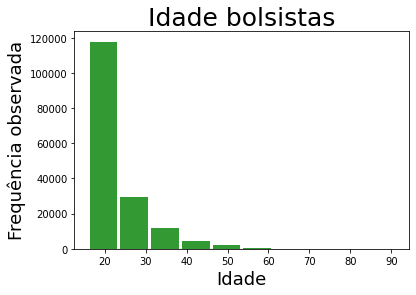

In [113]:
plt.hist(original_copia['IDADE'],rwidth=0.9, color = 'green', alpha=0.8)
plt.xlabel('Idade', size=18)
plt.ylabel('Frequência observada', size=18)
plt.title('Idade bolsistas', size=25)
plt.rcParams['figure.figsize'] = (10,5)
plt.show()


##Distribuição da faixa etária dos bolsistas agrupada em 5 classes

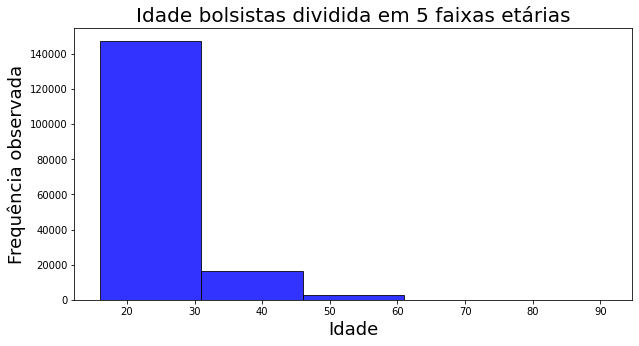

In [114]:
plt.hist(copia_4['IDADE'], 5, rwidth=1.0, color = 'blue', alpha=0.8, edgecolor='black')
plt.xlabel('Idade', size=18)
plt.ylabel('Frequência observada', size=18)
plt.title('Idade bolsistas dividida em 5 faixas etárias', size=20)
plt.show()

##Distribuição das bolsas por estado

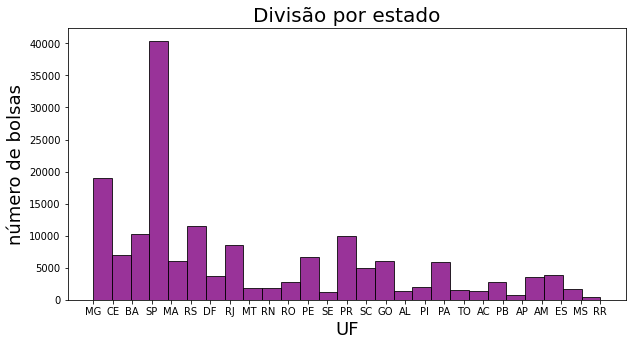

In [115]:
plt.hist(copia_4['UF_BENEFICIARIO'], 27, rwidth=1.0, color = 'purple', alpha=0.8, edgecolor='black')
plt.xlabel('UF', size=18)
plt.ylabel('número de bolsas', size=18)
plt.title('Divisão por estado', size=20)
plt.show()
#Tá ruim esta visualização, ordenar.

**Atenção!Para gerar o mapa de calor é necessário retirar a '#' de frente dos comandos aqui e também na etapa 3), visto que para rodar o apply geocode é necessário 1h42min, aproximadamente.**

##Verificação de regiões com concentração do maior número de bolsistas. Foi usado um mapa de calor.

In [116]:
#data = df_endereco['GEOLOCALIZACAO_POINT']
#mapObtf= folium.Map(width='100%', height='100%',location=[-15.788497, -47.879873], zoom_start=3)
#mapData = [[x[0], x[1], (x[2]-50)/(100-50)] for x in data]
#HeatMap(mapData, gradient={0.0: 'blue',
 #                          0.6:'cyan',
  #                         0.7:'lime',
  #                         0.8:'yellow',
   #                        1.0:'red'}, radius = 30).add_to(mapObtf)
#mapObtf.save('mapa_calor_Brasil.html')
#mapObtf
#Cor mínima=50 e máxima =100
#A location é do Brasil



##Divisão das bolsas por sexo

##**60,62%** das bolsas são de estudantes do sexo **Feminino**

In [117]:
original_copia['SEXO_BENEFICIARIO'].value_counts().sum()

166830

In [118]:
original_copia['SEXO_BENEFICIARIO'].value_counts()

F    101137
M     65693
Name: SEXO_BENEFICIARIO, dtype: int64

##Divisão de bolsas por região

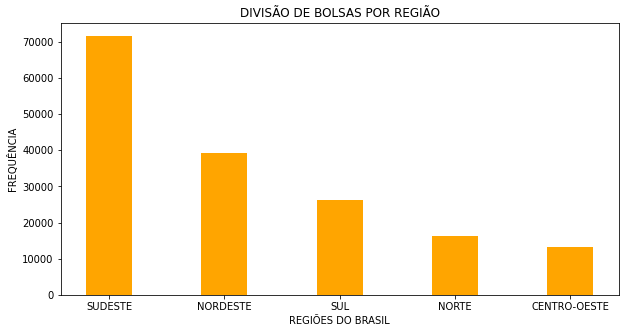

In [119]:
labels = ['SUDESTE', 'NORDESTE', 'SUL', 'NORTE', 'CENTRO-OESTE']
valores = [B[0], B[1], B[2], B[3], B[4]]
plt.bar(labels, valores,0.4, color='orange')
plt.xlabel("REGIÕES DO BRASIL")
plt.ylabel("FREQUÊNCIA")
plt.title("DIVISÃO DE BOLSAS POR REGIÃO")
plt.show()

In [120]:
A = original_copia['RACA_BENEFICIARIO'].value_counts()
print(A)

Parda            78067
Branca           64484
Preta            21153
Amarela           2900
Ind¡gena           153
NÆo Informada       73
Name: RACA_BENEFICIARIO, dtype: int64


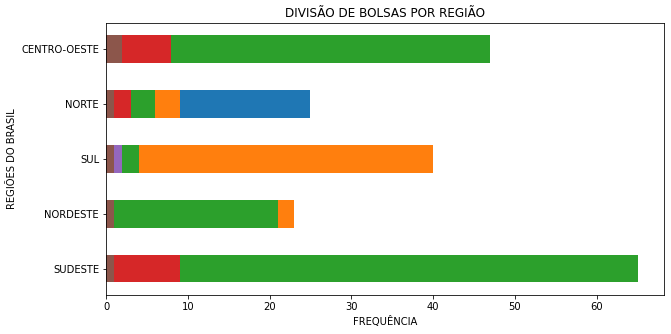

In [121]:
#EM andamento
rotulo = ['SUDESTE', 'NORDESTE', 'SUL', 'NORTE', 'CENTRO-OESTE']
Parda = [1, 4, 9, 25, 40]
Branca = [2, 23, 40, 9, 15]
Preta = [65, 21, 4, 6, 47]
Amarela = [9, 1, 2, 3, 8]
Indigena = [1, 1 , 2, 1, 2]
Nao_Infor= [1, 1, 1, 1, 2]

plt.barh(rotulo, Parda,0.5, label = 'Parda')
plt.barh(rotulo, Branca,0.5, label = 'Branca')
plt.barh(rotulo, Preta,0.5,label = 'Preta')
plt.barh(rotulo, Amarela,0.5,label = 'Amarela')
plt.barh(rotulo, Indigena,0.5,label = 'Indigena')
plt.barh(rotulo, Nao_Infor,0.5,label = 'Nao_Infor')

plt.xlabel("FREQUÊNCIA")
plt.ylabel("REGIÕES DO BRASIL")
plt.title("DIVISÃO DE BOLSAS POR REGIÃO")
plt.show()


In [122]:
original_copia['RACA_BENEFICIARIO'].value_counts()

Parda            78067
Branca           64484
Preta            21153
Amarela           2900
Ind¡gena           153
NÆo Informada       73
Name: RACA_BENEFICIARIO, dtype: int64

In [123]:
agrupar = original_copia['RACA_BENEFICIARIO'].groupby(original_copia['REGIAO_BENEFICIARIO'])

In [124]:
AB = agrupar.value_counts()
print(AB)

REGIAO_BENEFICIARIO               
CENTRO-OESTE         Parda             7247
                     Branca            3797
                     Preta             1765
                     Amarela            415
                     Ind¡gena            20
                     NÆo Informada       11
NORDESTE             Parda            24446
                     Branca            7665
                     Preta             6239
                     Amarela            838
                     Ind¡gena            50
                     NÆo Informada       14
NORTE                Parda            11932
                     Branca            2133
                     Preta             1866
                     Amarela            301
                     Ind¡gena            63
                     NÆo Informada        8
SUDESTE              Branca           31757
                     Parda            28965
                     Preta             9814
                     Amarela           10

TypeError: ignored

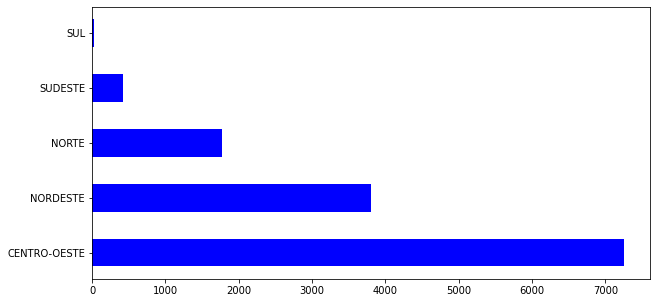

In [125]:
#EM andamento
rotulo = ['CENTRO-OESTE', 'NORDESTE', 'NORTE', 'SUDESTE', 'SUL']#Villages
Parda =np.array([AB[0], AB[1], AB[2], AB[3], AB[4]])
Branca =np.array([AB[5], AB[6], AB[7], AB[8], AB[9]])
Preta =np.array([AB[10], AB[11], AB[12], AB[13], AB[14]])
Amarela =np.array([AB[15], AB[16], AB[17], AB[18], AB[19]])
Indigena =np.array([AB[20], AB[21], AB[22], AB[23], AB[24]])
Nao_Infor=np.array([AB[25], AB[26], AB[27], AB[28], AB[29]])

plt.barh(rotulo, Parda,0.5, color='blue')
plt.barh(rotulo, Branca,0.5, color='purple', bottom=Parda)
plt.barh(rotulo, Preta,0.5,color='yellow', bottom=Parda + Branca)
plt.barh(rotulo, Amarela,0.5,color='green', bottom = Parda + Branca+ Preta)
plt.barh(rotulo, Indigena,0.5,color='grey', bottom = Parda + Branca+ Preta + Amarela)
plt.barh(rotulo, Nao_Infor,0.5,color='pink', bottom = Parda + Branca+ Preta + Amarela + Nao_Infor)

plt.xlabel("FREQUÊNCIA")
plt.ylabel("REGIÕES DO BRASIL")
plt.title("DIVISÃO DE BOLSAS POR REGIÃO")
plt.legend(('Parda', 'Branca', 'Preta', 'Amarela', 'Indígena', 'Não Informado' ))
plt.figure(figsize=(20,10))
plt.show()

In [ ]:
AB.dtypes

In [ ]:
AB[12]